# NESTML Izhikevich tutorial

Introduction
------------

The aim of this exercise is to obtain familiarity with NESTML by completing a partial model of the Izhikevich neuron [1].


Prerequisites
-------------

You need to have a working NEST Simulator and NESTML installation, see [Installing NESTML](https://nestml.readthedocs.io/en/latest/installation.html).

You need to be able to run NESTML to generate and build model code. NESTML can be used from the command line, and via a Python API. The latter will be used in this notebook. See [Running NESTML](https://nestml.readthedocs.io/en/latest/running.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nest
import numpy as np
import os

from pynestml.frontend.pynestml_frontend import generate_nest_target

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func("statusdict/prefix ::")



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@c73351d27
 Built: Feb 22 2023 17:35:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Paths

We assume here that we will generate code in a temporary directory `/tmp/nestml-component`. You can also create a unique temporary path using the [Python tempfile module](https://docs.python.org/3/library/tempfile.html).


The Izhikevich model
--------------------

A simple model for spiking neurons that nevertheless can exhibit a wide variety of dynamical behaviour, depending on its parameter values [1]. It is defined as follows:

\begin{align}
\frac{dv}{dt} &= 0.04 v^2 + 5 v + 140 - u + I\\
\frac{du}{dt} &= a (b v - u)
\end{align}

State update:

\begin{align}
   &\text{if}\;\; v \geq V_{th}:\\
   &\;\;\;\; v \text{ is set to } c\\
   &\;\;\;\; u \text{ is incremented by } d\\
   & \, \\
   &v \text{ jumps on each spike arrival by the weight of the spike}
\end{align}

Example parameters for regular spiking (the meaning of these parameters is described in detail in the paper [1]; see also Task 2 below): 

\begin{align}
a&=0.02\\
b&=0.2\\
c&=-65~\text{mV}\\
d&=8
\end{align}


Task 1: Finish the model
------------------------

In the file [`izhikevich_task.nestml`](https://raw.githubusercontent.com/nest/nestml/master/doc/tutorials/izhikevich/izhikevich_task.nestml), only a subset of the parameters, state equations and update block is implemented.

Open the file in a text editor and finish the partially-completed model.

For reference, the solution is included as [`izhikevich_solution.nestml`](https://raw.githubusercontent.com/nest/nestml/master/doc/tutorials/izhikevich/izhikevich_solution.nestml).

### NESTML code generation

Assume that our NESTML input model is at `izhikevich_solution.nestml`. To generate code and build a dynamic library that can be loaded as a user module in NEST Simulator:

In [2]:
generate_nest_target(input_path="izhikevich_solution.nestml",
                     target_path="/tmp/nestml-component",
                     logging_level="ERROR",
                     codegen_opts={"nest_path": NEST_SIMULATOR_INSTALL_LOCATION})





              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@c73351d27
 Built: Feb 22 2023 17:35:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

CMake Warning:
  Ignoring empty string ("") provided on the command line.


-- The CXX compiler identification is AppleClang 14.0.0.14000029
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
nestmlmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /Applications/Xcode.app/Contents/Developer/Toolchains/Xc

Check the generated log output for any potential error messages or warnings.

The generated module is called ``nestmlmodule`` by default. It can be loaded using ``nest.Install()``:

In [3]:
nest.Install("nestmlmodule")


Mar 07 18:25:59 Install [Info]: 
    loaded module nestmlmodule


### Instantiate model in NEST Simulator and run

Using the PyNEST API, the model can be instantiated and simulated in NEST. The following code will create one instance of the neuron model (`nest.Create("izhikevich_tutorial")`), inject a constant current and run the simulation for 250 ms.

Text(0.5, 0, 'Time [ms]')

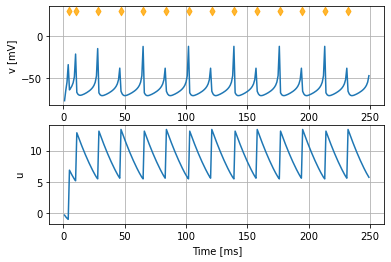

In [5]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

neuron = nest.Create("izhikevich_tutorial")
voltmeter = nest.Create("voltmeter")

voltmeter.set({"record_from": ["v", "u"]})
nest.Connect(voltmeter, neuron)

cgs = nest.Create('dc_generator')
cgs.set({"amplitude": 25.})
nest.Connect(cgs, neuron)

sr = nest.Create("spike_recorder")
nest.Connect(neuron, sr)

nest.Simulate(250.)

spike_times = nest.GetStatus(sr, keys='events')[0]['times']

fig, ax = plt.subplots(nrows=2)
ax[0].plot(voltmeter.get("events")["times"], voltmeter.get("events")["v"])
ax[1].plot(voltmeter.get("events")["times"], voltmeter.get("events")["u"])
ax[0].scatter(spike_times, 30 * np.ones_like(spike_times), marker="d", c="orange", alpha=.8, zorder=99)
for _ax in ax:
    _ax.grid(True)
ax[0].set_ylabel("v [mV]")
ax[1].set_ylabel("u")
ax[-1].set_xlabel("Time [ms]")
fig.show()

Task 2: Parameter space exploration
-----------------------------------

Perform a parameter space exploration to reproduce the bottom eight panels from [1], figure 2.

## References

[1] Eugene M. Izhikevich, "Simple Model of Spiking Neurons", IEEE Transactions on Neural Networks, Vol. 14, No. 6, November 2003

## Copyright

This file is part of NEST.

Copyright (C) 2004 The NEST Initiative

NEST is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 2 of the License, or (at your option) any later version.

NEST is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with NEST.  If not, see <http://www.gnu.org/licenses/>.
